Create Player Ratings

In [1]:
import sys
sys.path.append("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from player_ratings import *

import os
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [3]:
import matplotlib.font_manager as fm

font_path = "/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/viz/fonts"
for x in os.listdir(font_path):
    if x != ".DS_Store":
        for y in os.listdir(f"{font_path}/{x}"):
            if y.split(".")[-1] == "ttf":
                fm.fontManager.addfont(f"{font_path}/{x}/{y}")
                try:
                    fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
                except Exception:
                    continue
plt.style.use("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/viz/mplstyle/dark_theme.mplstyle")

In [4]:
player_stats = pd.read_csv("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/data/player_stats.csv")
player_stats['Season'] = player_stats['Match_ID'].apply(lambda x: int(x[:4]))
player_stats['Player_Season'] = player_stats['Player'] + "_" + player_stats['Season'].astype(str)

player_stats['Score'] = player_stats['Behinds'] + player_stats['Goals']*6
player_stats['xScore_Diff'] = player_stats['Score'] - player_stats['xScore']

player_stats.head()

,Match_ID,Team,Player,Round_ID,AFL_API_Player_ID,Player_Type,playerId,Age,Height,Weight,Number,Kicking_Foot,State_Of_Origin,Draft_Year,Debut_Year,Recruited_From,Draft_Position,Draft_Type,Photo_URL,Date_Of_Birth,Percent_Played,Behinds,Bounces,Centre_Bounces_Attended,Centre_Clearances,Clangers,Defensive_Contest_Losses,Defensive_Contest_Loss_Percentage,Defensive_One_On_One_Contests,Contested_Marks,Contested_Possession_Rate,Contested_Possessions,Offensive_One_On_One_Contests,Offensive_Contest_Wins,Offensive_Contest_Win_Percentage,Defensive_Half_Pressure_Acts,Disposal_Efficiency,Disposals,AFL_Fantasy_Points,Effective_Disposals,Effective_Kicks,Inside_50_Ground_Ball_Gets,Frees_Against,Frees_For,Goal_Accuracy,Goal_Assists,Goals,Ground_Ball_Gets,Handballs,Hit_Outs,Hit_Outs_To_Advantage,Hit_Outs_To_Advantage_Rate,Hit_Out_Win_Percentage,Inside_50s,Intercept_Marks,Intercepts,Kick_Efficiency,Kick_Ins,Kick_Ins_Played_On,Kicks,Kick_To_Handball_Ratio,Marks,Marks_Inside_50,Marks_On_Lead,Metres_Gained,One_Percenters,Pressure_Acts,Player_Rating_Points,Rebound_50s,Ruck_Contests,Score_Involvements,Score_Launches,Shots_At_Goal,Spoils,Stoppage_Clearances,Tackles,Tackles_Inside_50,Clearances,Possessions,Turnovers,Uncontested_Possessions,AFLCA_Player_ID,Coaches_Votes,Position,Team_Status,Position_Sub_Group,Position_Group,Year,Brownlow_Votes,Season,xScore,xT_created,xT_denied,vaep_value,offensive_value,defensive_value,exp_vaep_value,exp_offensive_value,exp_defensive_value,xT_received,xT_prevented,vaep_value_received,exp_vaep_value_received,Player_Season,Score,xScore_Diff
0,202101_BrisbaneLions_Sydney,Brisbane Lions,Brandon Starcevich,202101,Brandon_Starcevich,MEDIUM_DEFENDER,CD_I1002401,22,187,92,37,RIGHT,WA,2017.0,2018.0,Mt Lawley-Inglewood (WA)/Trinity Coll (WA)/Eas...,18.0,nationalDraft,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1999-07-24,84,0,1.0,0.0,0,1,1.0,100.0,1.0,1,55.6,5,0.0,0.0,0.0,4.0,88.9,9,31,8.0,5.0,0.0,0,1,0.0,0,0,3.0,3,0,0.0,0.0,0.0,0,1.0,4,83.3,0.0,0.0,6,2.0,2,0,1.0,172.0,1,5.0,6.1,2,0.0,4,1.0,0,1.0,1,0,0,1,9,2,4,NaN,NaN,Half Back Flank Left,FINAL_TEAM,Half-Back,Back,2021.0,0.0,2021,0.000000,-0.235667,0.000000,0.711460,0.026457,0.685004,3.362637,0.585132,2.777505,-0.461340,0.190552,0.329877,2.328707,Brandon Starcevich_2021,0,0.000000
1,202101_BrisbaneLions_Sydney,Brisbane Lions,Callum Ah Chee,202101,Callum_Ah_Chee,MEDIUM_DEFENDER,CD_I298437,24,183,79,4,RIGHT,WA,2015.0,2016.0,Kelmscott (WA)/South Fremantle (WAFL)/Gold Coast,8.0,nationalDraft,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1997-10-09,87,0,0.0,0.0,0,4,1.0,100.0,1.0,0,66.7,8,0.0,0.0,0.0,5.0,83.3,12,36,10.0,5.0,0.0,2,0,0.0,1,0,8.0,6,0,0.0,0.0,0.0,2,0.0,7,83.3,1.0,1.0,6,1.0,0,0,0.0,258.0,2,7.0,8.0,1,0.0,2,1.0,0,2.0,0,3,1,0,12,6,4,NaN,NaN,Interchange,FINAL_TEAM,Interchange,Interchange,2021.0,0.0,2021,0.000000,-0.075963,0.010892,0.291451,0.479986,-0.188535,1.318957,1.031427,0.287530,-0.487945,-0.039690,0.608221,3.269039,Callum Ah Chee_2021,0,0.000000
2,202101_BrisbaneLions_Sydney,Brisbane Lions,Charlie Cameron,202101,Charlie_Cameron,MEDIUM_FORWARD,CD_I990609,27,180,75,23,RIGHT,WA,2014.0,2014.0,Newman Saints (WA)/Swan Districts (WAFL)/Adelaide,NaN,rookieElevation,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1994-07-05,77,0,0.0,9.0,3,0,0.0,0.0,0.0,0,50.0,5,0.0,0.0,0.0,3.0,70.0,10,39,7.0,4.0,0.0,0,2,0.0,1,0,1.0,3,0,0.0,0.0,0.0,3,0.0,1,57.1,0.0,0.0,7,2.3,2,1,2.0,207.0,1,9.0,10.1,0,0.0,4,1.0,0,0.0,0,1,0,3,10,0,5,NaN,NaN,Forward Pocket Right,FINAL_TEAM,Forward-Pocket,Forward,2021.0,0.0,2021,0.000000,0.460322,-0.166355,0.696752,0.681301,0.015451,6.034727,5.882581,0.152147,0.197894,-0.035491,0.859897,8.186274,Charlie Cameron_2021,0,0.000000
3,202101_BrisbaneLions_Sydney,Brisbane Lions,Daniel Rich,202101,Daniel_Rich,MEDIUM_DEFENDER,CD_I271072,31,183,95,10,LEFT,WA,2008.0,2009.0,Sorrento-Duncraig (WA)/Subiaco (WAFL),7.0,nationalDraft,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1990-06-07,84,0,0.0,0.0,0,4,1.0,50.0,2.0,0,12.5,2,0.0,0.0,0.0,5.0,60.9,23,95,14.0,12.0,0.0

In [5]:
player_stats[['Position_Group', 'Position_Sub_Group']].value_counts().sort_index()

Position_Group  Position_Sub_Group
Back            Back-Pocket           2249
                Half-Back             2231
                Key-Back              2246
Forward         Forward-Pocket        2233
                Half-Forward          2208
                Key-Forward           2247
Interchange     Interchange           5463
Midfield        Centre                3354
                Wing                  2191
Ruck            Ruck                  1148
dtype: int64

In [6]:
SELECTED_POSITION = "Forward"

position_role_stats = {
    'goal_scoring' : [
        'Goals',
        'Score',
        'xScore',
        'xScore_Diff',
        'Shots_At_Goal',
        'xT_received',
        'vaep_value_received',
        'offensive_value',
        'exp_vaep_value_received',
        'exp_offensive_value'
    ],
    'goal_creating' : [
        'Score_Involvements',
        'Score_Launches',
        'Inside_50s',
        'xT_created',
        'vaep_value',
        'offensive_value',
        'exp_vaep_value',
        'exp_offensive_value'
    ],
    'contest' : [
        'Contested_Marks',
        'Contested_Possessions',
        'Offensive_One_On_One_Contests',
        'Offensive_Contest_Wins',
        'Inside_50_Ground_Ball_Gets',
        'Possessions',
        'Uncontested_Possessions'
    ]}

In [7]:
position_summary, position_role_stats_zscaled = create_position_summary(player_stats, SELECTED_POSITION, position_role_stats)
selected_position_rating = get_selected_position_rating(SELECTED_POSITION)
position_summary.sort_values(by=selected_position_rating, ascending=False).head(10)

Games        Age  Height  \
Player             Team                   Season                             
Tom J. Lynch       Richmond               2022       19  29.000000   199.0   
Marcus Bontempelli Western Bulldogs       2021       11  26.000000   193.0   
Charlie Curnow     Carlton                2023       19  26.000000   194.0   
Taylor Walker      Adelaide               2021       16  31.000000   194.0   
                                          2023       18  33.000000   194.0   
Toby Greene        Greater Western Sydney 2021       18  28.000000   182.0   
Jake Stringer      Essendon               2021       18  27.000000   192.0   
Taylor Walker      Adelaide               2022       18  31.833333   194.0   
Shai Bolton        Richmond               2022       23  23.000000   175.0   
Lance Franklin     Sydney                 2021       18  34.000000   199.0   

                                                  Weight  Debut_Year  \
Player             Team                   Season                       
Tom J. Lynch       Richmond               2022      99.0      2011.0   
Marcus Bontempelli Western Bulldogs       2021      93.0      2014.0   
Charlie Curnow     Carlton                2023      94.0      2016.0   
Taylor Walker      Adelaide               2021     102.0      2009.0   
                                          2023     102.0      2009.0   
Toby Greene        Greater Western Sydney 2021      84.0      2012.0   
Jake Stringer      Essendon               2021      91.0      2013.0   
Taylor Walker      Adelaide               2022     102.0      2009.0   
Shai Bolton        Richmond               2022      77.0      2017.0   
Lance Franklin     Sydney                 2021     107.0      2005.0   

                                                  Draft_Position  \
Player             Team                   Season                   
Tom J. Lynch       Richmond               2022              11.0   
Marcus Bontempelli Western Bulldogs       2021               4.0   
Charlie Curnow     Carlton                2023              12.0   
Taylor Walker      Adelaide               2021              75.0   
                                          2023              75.0   
Toby Greene        Greater Western Sydney 2021              11.0   
Jake Stringer      Essendon               2021               5.0   
Taylor Walker      Adelaide               2022              75.0   
Shai Bolton        Richmond               2022              29.0   
Lance Franklin     Sydney                 2021               5.0   

                                                  xScore_Diff_sum  Goals_sum  \
Player             Team                   Season                               
Tom J. Lynch       Richmond               2022          16.432117         63   
Marcus Bontempelli Western Bulldogs       2021          14.207115         18   
Charlie Curnow     Carlton                2023          51.145957         67   
Taylor Walker      Adelaide               2021          16.346179         43   
                                          2023          72.610883         61   
Toby Greene        Greater Western Sydney 2021         -30.288374         45   
Jake Stringer      Essendon               2021          13.216978         37   
Taylor Walker      Adelaide               2022          31.994374         47   
Shai Bolton        Richmond               2022         -29.850337         43   
Lance Franklin     Sydney                 2021          32.875920         51   

                                                  Score_Launches_sum  \
Player             Team                   Season                       
Tom J. Lynch       Richmond               2022                   4.0   
Marcus Bontempelli Western Bulldogs       2021                  20.0   
Charlie Curnow     Carlton                2023                  10.0   
Taylor Walker      Adelaide               2021                  24.0   
                                      

In [8]:
players = create_player_rating_by_season(position_summary, SELECTED_POSITION, position_role_stats_zscaled)
players.sort_values(by='overall_'+selected_position_rating, ascending=False).head(20)

forward_rating                      \
Season                                            2021      2022      2023   
Player           Team                                                        
Taylor Walker    Adelaide                     1.679475  1.302682  1.504083   
Charlie Curnow   Carlton                      0.000000  0.999286  1.698466   
Toby Greene      Greater Western Sydney       1.462620  0.442821  1.059213   
Tom J. Lynch     Richmond                     0.640196  2.010600  0.000000   
Dustin Martin    Richmond                     0.767092  0.000000  0.812925   
Aaron Naughton   Western Bulldogs             0.651955  0.693923  0.451902   
Tom Hawkins      Geelong                      0.546917  0.874258  0.374219   
Jeremy Cameron   Geelong                      0.867733  0.622498  0.442950   
Cameron Zurhaar  North Melbourne              0.132675  0.215988  0.588711   
Tom Papley       Sydney                       0.309340  0.649976  0.340567   
Mitch Lewis      Hawthorn                    -0.047983  0.227518  0.523817   
Shai Bolton      Richmond                     0.000000  1.241228  0.000000   
Joe Daniher      Brisbane Lions               0.305636  0.114050  0.500809   
Luke Breust      Hawthorn                     0.326699  0.572556  0.262701   
Jack Higgins     St Kilda                    -0.013962  0.243005  0.411122   
Harry McKay      Carlton                      0.927263  0.362786  0.184864   
Jeremy Finlayson Port Adelaide                0.000000  0.000000  0.519330   
Charlie Dixon    Port Adelaide                0.674085  0.000000  0.367498   
Jesse Hogan      Greater Western Sydney       0.000000  0.361961  0.292819   
Bayley Fritsch   Melbourne                    0.302505  0.267314  0.277633   

                                        overall_forward_rating  
Season                                                          
Player           Team                                           
Taylor Walker    Adelaide                             1.461202  
Charlie Curnow   Carlton                              1.318865  
Toby Greene      Greater Western Sydney               0.914636  
Tom J. Lynch     Richmond                             0.667200  
Dustin Martin    Richmond                             0.564464  
Aaron Naughton   Western Bulldogs                     0.544514  
Tom Hawkins      Geelong                              0.541501  
Jeremy Cameron   Geelong                              0.539293  
Cameron Zurhaar  North Melbourne                      0.431290  
Tom Papley       Sydney                               0.430267  
Mitch Lewis      Hawthorn                             0.377747  
Shai Bolton      Richmond                             0.372368  
Joe Daniher      Brisbane Lions                       0.365264  
Luke Breust      Hawthorn                             0.362058  
Jack Higgins     St Kilda                             0.318178  
Harry McKay      Carlton                              0.312481  
Jeremy Finlayson Port Adelaide                        0.311598  
Charlie Dixon    Port Adelaide                        0.287907  
Jesse Hogan      Greater Western Sydney               0.284280  
Bayley Fritsch   Melbourne                            0.277025

Visualise

In [9]:
# display_histograms(position_summary, nrows=9, ncols=4, stats=position_stats_zscaled)

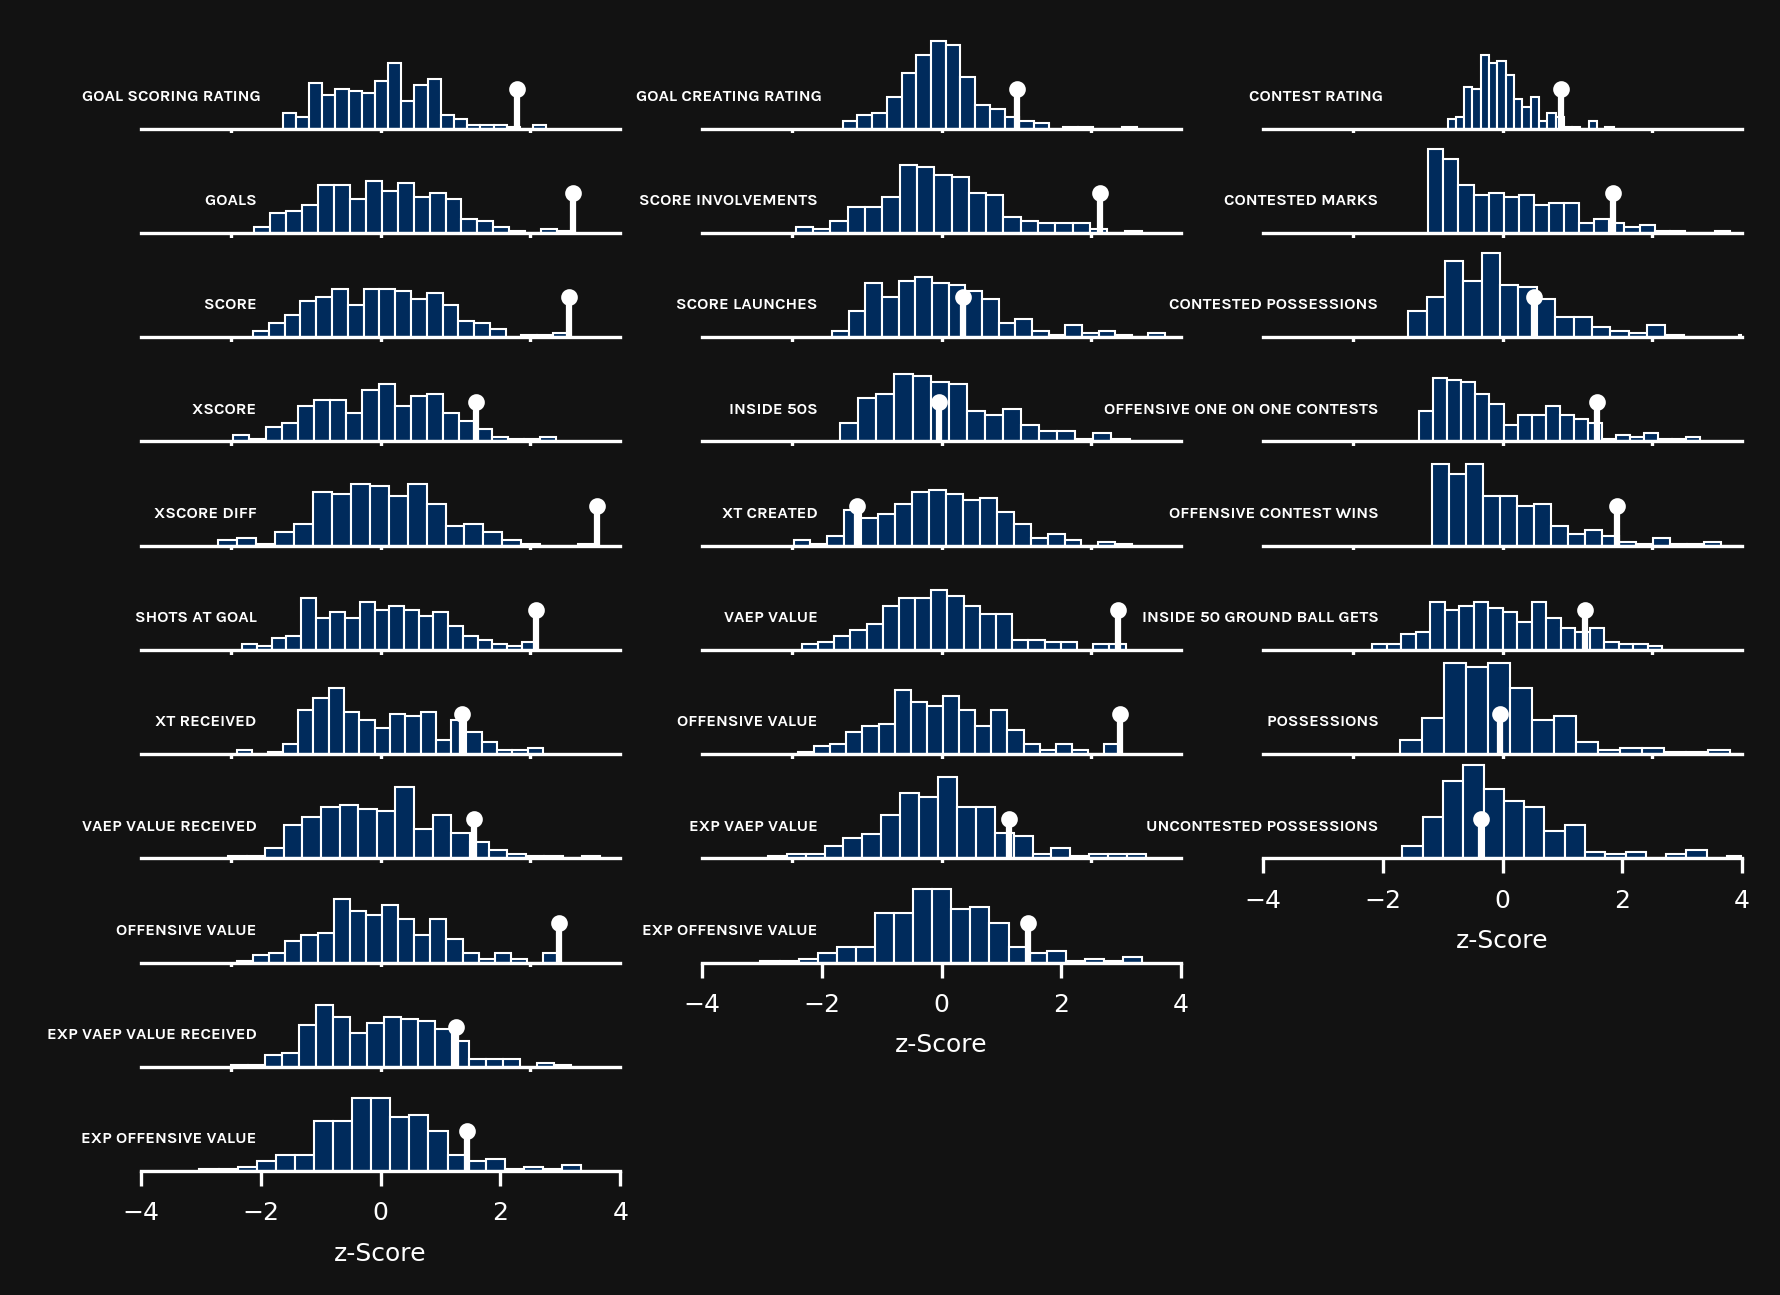

In [10]:
player = "Taylor Walker"
team = "Adelaide"
season = 2023

stats_list = [['goal_scoring_rating'] + position_role_stats_zscaled['goal_scoring'], 
              ['goal_creating_rating'] + position_role_stats_zscaled['goal_creating'], 
              ['contest_rating'] + position_role_stats_zscaled['contest']]

fig, axs = plot_multiple_role_histograms(position_summary, stats_list, player, team, season, xlim=4, ylim = 50)

In [ ]:
player = "Tom J. Lynch"
team = "Richmond"
season = 2022

for role in position_role_stats_zscaled.keys():
    stats = position_role_stats_zscaled[role] + [role+'_rating']
    fig, ax = player_stats_histograms(position_summary, player, team, season, stats)
    
stats = [x+"_rating" for x in list(position_role_stats_zscaled.keys())] + [selected_position_rating]
fig, ax = player_stats_histograms(position_summary, player, team, season, stats, figsize=(8, 6), xlim=3, xlabel = "Rating")
    